In [19]:
import pandas as pd

df1 = pd.read_csv("financial_data.csv")
df = pd.read_csv("financial_data.csv")

df = df.select_dtypes(include=['number'])

print(df.info())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Columns: 105 entries, totalAssets to volatility_6m
dtypes: float64(104), int64(1)
memory usage: 14.4 MB
None
        totalAssets  totalCurrentAssets  \
count  1.796600e+04        1.796600e+04   
mean   7.702516e+10        1.320511e+10   
std    3.209269e+11        3.829014e+10   
min    0.000000e+00        1.000000e+01   
25%    7.100000e+09        1.594632e+09   
50%    1.877691e+10        3.754000e+09   
75%    4.801322e+10        9.623500e+09   
max    2.691500e+13        7.695960e+11   

       cashAndCashEquivalentsAtCarryingValue  cashAndShortTermInvestments  \
count                           1.796600e+04                 1.796600e+04   
mean                            5.582360e+09                 7.430703e+09   
std                             2.900210e+10                 3.405027e+10   
min                             0.000000e+00                 0.000000e+00   
25%                             3.086150e+

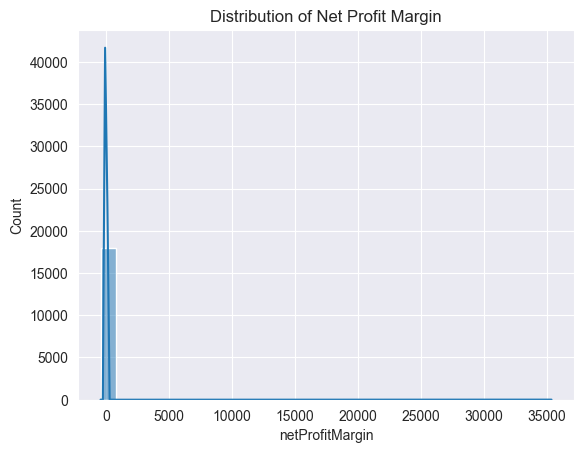

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["netProfitMargin"], bins=30, kde=True)
plt.title("Distribution of Net Profit Margin")
plt.show()

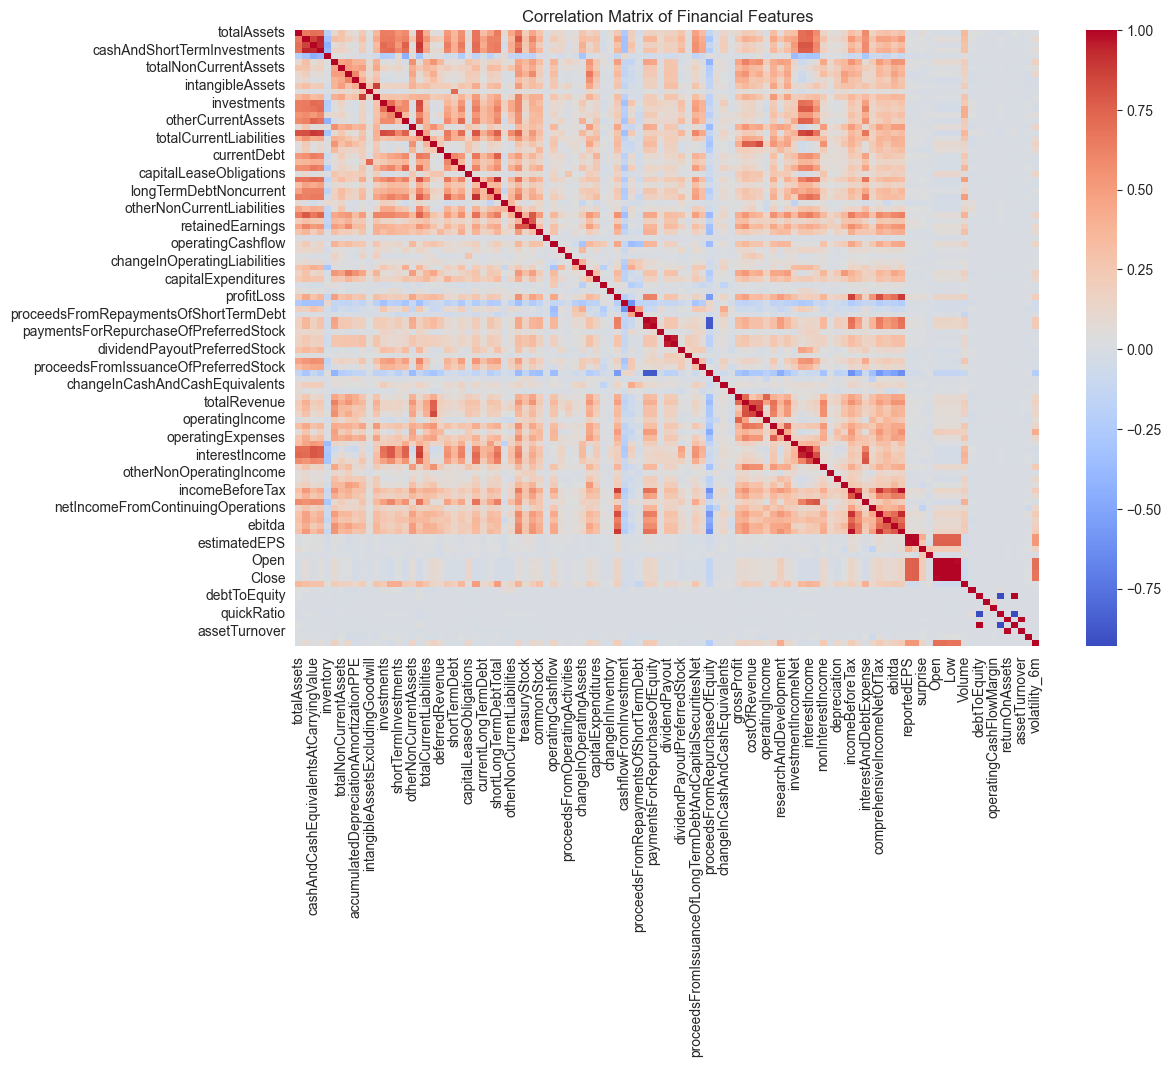

In [9]:
import numpy as np

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Financial Features")
plt.show()

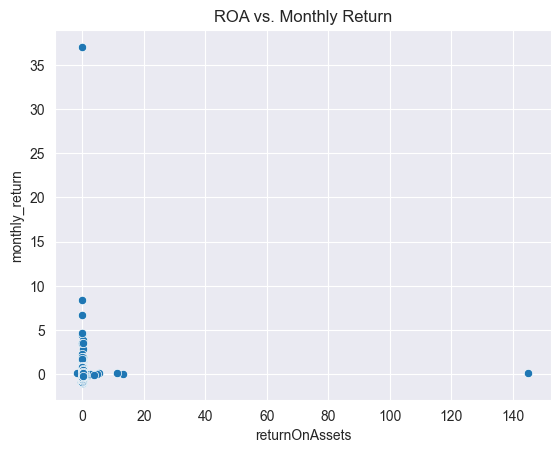

In [10]:
sns.scatterplot(x=df["returnOnAssets"], y=df["monthly_return"])
plt.title("ROA vs. Monthly Return")
plt.show()

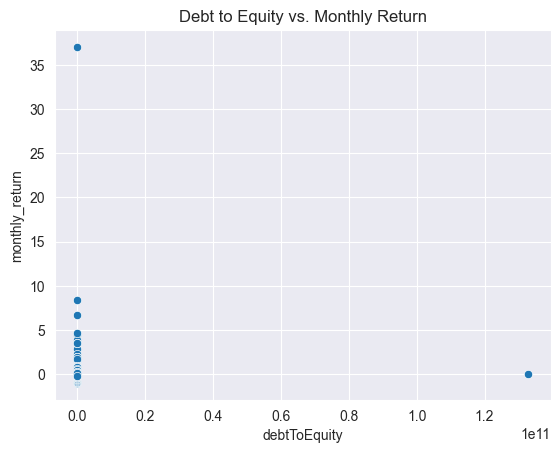

In [11]:
sns.scatterplot(x=df["debtToEquity"], y=df["monthly_return"])
plt.title("Debt to Equity vs. Monthly Return")
plt.show()

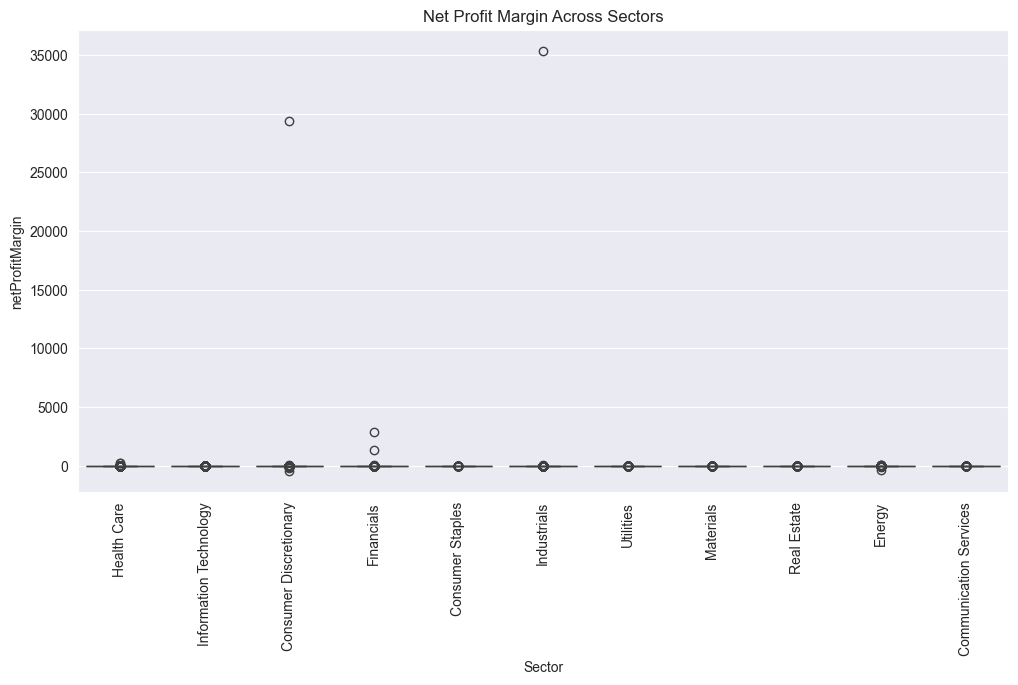

In [21]:
1plt.figure(figsize=(12, 6))
sns.boxplot(x=df1["Sector"], y=df1["netProfitMargin"])
plt.xticks(rotation=90)
plt.title("Net Profit Margin Across Sectors")
plt.show()

In [20]:
print(df1.columns.tolist())

['fiscalDateEnding', 'reportedCurrency_x', 'totalAssets', 'totalCurrentAssets', 'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments', 'inventory', 'currentNetReceivables', 'totalNonCurrentAssets', 'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE', 'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill', 'investments', 'longTermInvestments', 'shortTermInvestments', 'otherCurrentAssets', 'otherNonCurrentAssets', 'totalLiabilities', 'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue', 'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities', 'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt', 'longTermDebtNoncurrent', 'shortLongTermDebtTotal', 'otherCurrentLiabilities', 'otherNonCurrentLiabilities', 'totalShareholderEquity', 'treasuryStock', 'retainedEarnings', 'commonStock', 'commonStockSharesOutstanding', 'Ticker', 'reportedCurrency_y', 'operatingCashflow', 'paymentsForOperatingActivities', 'proceedsFrom